<a href="https://colab.research.google.com/github/paulo-batista/Stanford-University/blob/master/Neuronet_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Computer Vision Example

The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [41]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [42]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [43]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

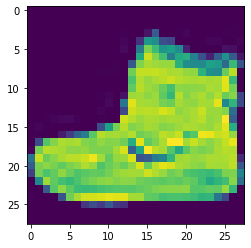

In [46]:
# Visualize the image
plt.imshow(training_images[index])

In [47]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [48]:
len(training_images), len(test_images)

(60000, 10000)

In [49]:
# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

LABEL: 9

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

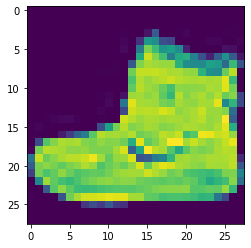

In [50]:
# Visualize the image
plt.imshow(training_images[index])

In [51]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential:** Isso define uma sequência de camadas na rede neural.

**Flatten:** Lembre-se anteriormente onde nossas imagens eram uma matriz de 28x28 pixels quando você as imprimiu? Flatten apenas pega esse quadrado e o transforma em uma matriz unidimensional.

**Dense:** Adiciona uma camada de neurônios

Cada camada de neurônios precisa de uma função de ativação para dizer a eles o que fazer. Existem muitas opções, mas apenas use estas por enquanto, temos:

**ReLU** significa:

      if x > 0: 
        return x

      else: 
        return 0

**Softmax** pega uma lista de valores e os dimensiona para que a soma de todos os elementos seja igual a 1. Quando aplicado às saídas do modelo, você pode pensar nos valores dimensionados como a probabilidade dessa classe.

In [52]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[10.0, 3.0, 4.0, 6.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')


input to softmax function: [[10.  3.  4.  6.]]


In [53]:
# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

output of softmax function: [[9.78754879e-01 8.92508923e-04 2.42609079e-03 1.79265209e-02]]


In [54]:
# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

sum of outputs: 1.0


In [55]:
# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

class with highest probability: 0


In [61]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3014 - accuracy: 0.8906
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2897 - accuracy: 0.8935
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2790 - accuracy: 0.8969
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2691 - accuracy: 0.9010
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2603 - accuracy: 0.9034
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2532 - accuracy: 0.9074
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2472 - accuracy: 0.9088
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2388 - accuracy: 0.9112
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2325 - accuracy: 0.9142
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.229

Best Dense Layer training performance/accuracy:

**64 Neurons - 0.8847**

128 Neurons - 0.8676

512 Neurons - 0.8936

1024 Neurons - 0.8955

**Best accuracy** when adding more epochs, from 5 to 15, got 0.9242 of accuracy;

In [62]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 848us/step - loss: 0.3742 - accuracy: 0.8735


[0.3742305636405945, 0.8734999895095825]

In [63]:
#Classification

classifications = model.predict(test_images)

In [64]:
#It's the probability that this item is each of the 10 classes
classifications[0]

array([3.6220282e-10, 1.4546780e-12, 2.2829109e-15, 1.1905361e-13, 5.0307367e-12, 8.4212155e-07, 5.6121792e-09, 7.4930899e-03, 5.8142442e-09, 9.9250609e-01], dtype=float32)

In [65]:
# Get the index with highest value
prediction = np.argmax(classifications[0])
print(f'class with highest probability: {prediction}')

class with highest probability: 9
